In [1]:
%matplotlib inline
import openml as oml
import seaborn as sns
import numpy as np
import pandas as pd
import sys
from scipy.stats import norm
from matplotlib import pyplot

benchmark_suite = oml.study.get_study('OpenML100','tasks') # obtain the 100 tasks

In [2]:
def list_all(listing_call, *args, **filters):
    """Helper to handle paged listing requests.
    Example usage: evaluations = list_all(list_evaluations, "predictive_accuracy", task=mytask)

    Parameters
    ----------
    listing_call : object
        Name of the listing call, e.g. list_evaluations
    *args : Variable length argument list
        Any required arguments for the listing call
    **filters : Arbitrary keyword arguments
        Any filters that need to be applied

    Returns
    -------
    object
    """
    batch_size = 10000
    page = 0
    has_more = 1
    result = {}
    while has_more and page<=10:
        new_batch = listing_call(*args, size=batch_size, offset=batch_size*page, **filters)
        result.update(new_batch)
        page += 1
        has_more = (len(new_batch) == batch_size)
        #if has_more:
        #    print(str(page*10000)+" evaluations downloaded")
    print(len(result),"evaluations downloaded")
    return result

In [5]:
tasks = []
all_scores = []

for count, task_id in enumerate(benchmark_suite.tasks): # iterate over all tasks. Can be removed if list_evaluations used paging!
    print("Fetching evaluations for task ",task_id,"-",count,"%")
    try:
        evaluations = list_all(oml.evaluations.list_evaluations, task=[task_id], function='area_under_roc_curve')
        for id, e in evaluations.items():
            tasks.append(e.data_name)
            all_scores.append(e.value)
    except oml.exceptions.OpenMLServerException as e:
        print("OpenML error:", str(e),"for task",task_id)
        
df = pd.DataFrame(dict(x=all_scores, g=tasks))

# Sort by median over individual tasks
df['g'] = pd.Categorical(df['g'], df.groupby(['g']).median().sort('x').index.tolist())
df.sort('g');

Fetching evaluations for task  3 - 0 %
99856 evaluations downloaded
Fetching evaluations for task  6 - 1 %
16956 evaluations downloaded
Fetching evaluations for task  11 - 2 %
5413 evaluations downloaded
Fetching evaluations for task  12 - 3 %
3436 evaluations downloaded
Fetching evaluations for task  14 - 4 %
3374 evaluations downloaded
Fetching evaluations for task  15 - 5 %
5797 evaluations downloaded
Fetching evaluations for task  16 - 6 %
3350 evaluations downloaded
Fetching evaluations for task  18 - 7 %
3746 evaluations downloaded
Fetching evaluations for task  20 - 8 %
3483 evaluations downloaded
Fetching evaluations for task  21 - 9 %
3943 evaluations downloaded
Fetching evaluations for task  22 - 10 %
3439 evaluations downloaded
Fetching evaluations for task  23 - 11 %
3874 evaluations downloaded
Fetching evaluations for task  24 - 12 %
3846 evaluations downloaded
Fetching evaluations for task  28 - 13 %
3557 evaluations downloaded
Fetching evaluations for task  29 - 14 %
599

,g,x
2613416,climate-model-simulation-crashes,0.872250
2633016,climate-model-simulation-crashes,0.876254
2633017,climate-model-simulation-crashes,0.471484
2633018,climate-model-simulation-crashes,0.471484
2633019,climate-model-simulation-crashes,0.859796
2633020,climate-model-simulation-crashes,0.471484
2633021,climate-model-simulation-crashes,0.827891
2633022,climate-model-simulation-crashes,0.471484
2633023,climate-model-simulation-crashes,0.807076
2633024,climate-model-simulation-crashes,0.471484


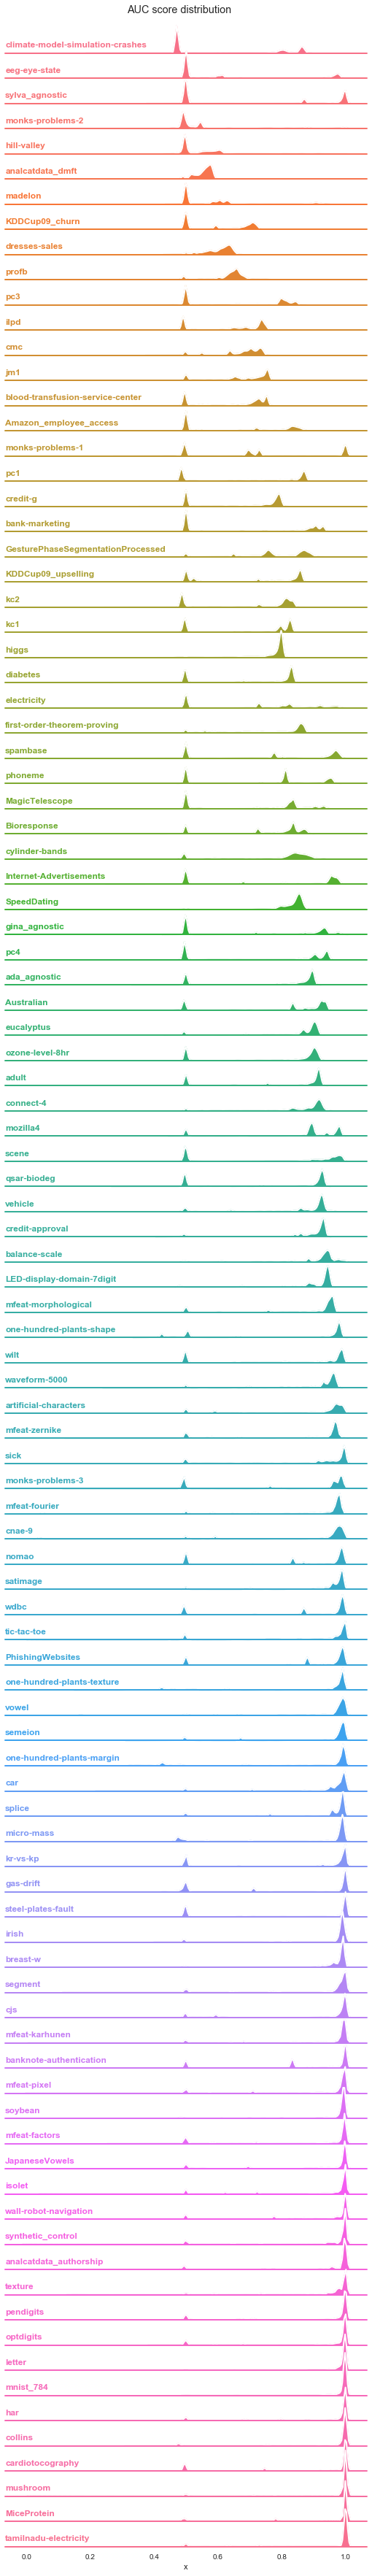

In [6]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.005)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.005)
g.map(pyplot.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = pyplot.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.5)

# Remove axes details that don't play will with overlap
g.set(yticks=[])
g.set_titles("")
g.fig.suptitle('AUC score distribution')
g.fig.subplots_adjust(top=.98)
g.despine(bottom=True, left=True)